# Upper Confidence Bound (UCB)

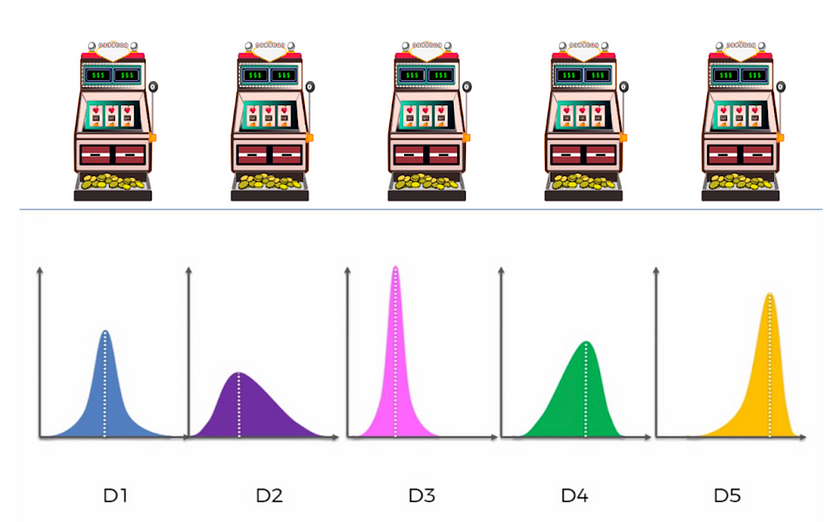

**Multi-Armed Bandits Problem**: Suppose there were 5 single-armed slot machines and **you don't know the probability distribution of rewards behind them**. This problem is to figure out the ways to **maximize your profits** from the number of games played **on all of these 5 machines**.

**Upper Confidence Bound (UCB)** is an algorithm used to solve the above type of problem. This algorithm focuses on **exploration and exploitation** based on a **confidence boundary** that the algorithm assigns to each machine **on each round of exploration.** These boundary **decreases** when a machine is used more in comparison to other machines. <br>
*   **Exploration**: going onto on all the 5 slot machines **enough times** to **understand** which one will maximize your profits.
*   **Exploitation**: it comes when you have a **pretty good idea** about which machine **will give you maximum profits** and you **play on that machine** only to maximize your profit.



$N_m(n)$ = number of time the **machine m was selected up** to round n<br>
$R_m(n)$ = number of **rewards of the machine** up to round n
Here are the specific steps:
1.   Select the machine $m$ that has the **highest upper confidence bound**
2.   Calculate the **average reward** of machine $m$ up to n, $r_m(n) = \dfrac{R_m(n)}{N_m(n)}$
3.   Calculate the **confidence interval** of machine $m$ up to n, $Δ_m(n) = \sqrt{\dfrac{1.5 * log(n)}{N_m(n)}}$
4.   Then machine $m$ will have a **new upper confidence bound** of $r_m(n) + Δ_m(n)$
5.   **Repeat above steps until a certain limit** and the machine in the final result having the **highest upper confidence bound** will be the result.





## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Importing the dataset

In [ ]:
#in real scenario, we don't have this dataset; instead, calcuating in real time
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing UCB

In [ ]:
# number of users
N = dataset.shape[0]
# number of ads we are testing on
d = dataset.shape[1]
# list tracking number of selections for each ad
numbers_of_selections = [0] * d
# list tracking number of clicks for each ad
sums_of_rewards = [0] * d

for n in range(1, N + 1):
  # these two variables tracking the maximum upper bound ad to be selected
  ad = 0
  max_upper_bound = 0
  for i in range(d):
    # case in which the ad has been selected before
    if numbers_of_selections[i] > 0:
      # calculating the new upper bound based on the equation
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      detla_i = math.sqrt(1.5 * math.log(n) / numbers_of_selections[i])
      upper_bound = average_reward + detla_i
    # case in which the ad has not been selected before
    else:
      # put an extreme value for upper_bound to allow this ad to be selected
      upper_bound = 1e400

    # record the current max_bound and index of its ad
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i

  # after determining the maximum upper bound
  # update the number of selection for this ad
  numbers_of_selections[ad] += 1
  # update the reward for this ad
  reward = dataset.iloc[n - 1, ad]
  sums_of_rewards[ad] += reward

  # output the final result with the highest upper bound
  if n == N:
    print(max_upper_bound)
    print(ad)

0.31169506812765957
4


Hence, ad 4 would have the highest upper bound and we would select 4 to be our advertisement.